# Technical Indicators

## SMA

Simple Moving Average (SMA) is a technical indicator that is commonly used in financial analysis and trading. Moving averages are versatile tools that can be used to identify trends, support and resistance levels, and other trading opportunities.

Simple moving averages can be used in various ways, including:

- Trend Identification: Moving averages can help identify the overall trend of a security by smoothing out fluctuations in the price.
- Support and Resistance: Moving averages can act as support or resistance levels, as they provide a visual representation of the average price of a security over a given time period.
- Buy and Sell Signals: Moving averages can be used to generate buy and sell signals by combining them with other technical indicators or chart patterns.
- Momentum Indicator: Moving averages can be used as a momentum indicator, which measures the rate of change in the price of a security.

## EMA

An Exponential Moving Average (EMA) is a technical indicator that is often used in financial analysis and trading. Its use cases and calculations are very similar to Simple Moving Averages (SMA) but with an added variable of weights.

Unlike Simple Moving Averages which give equal weight to every period, Exponential Moving Averages give higher weights to the most recent periods, as to better reflect the latest price action.

Exponential moving averages can be used in various ways, including:

- Trend Identification: Moving averages can help identify the overall trend of a security by smoothing out fluctuations in the price.
- Support and Resistance: Moving averages can act as support or resistance levels, as they provide a visual representation of the average price of a security over a given time period.
- Buy and Sell Signals: Moving averages can be used to generate buy and sell signals by combining them with other technical indicators or chart patterns.
- Momentum Indicator: Moving averages can be used as a momentum indicator, which measures the rate of change in the price of a security.


# Trading Strategy

## Chose Underlying Asset

- Select Highly liquid stocks with a history of significant price movements.This liquidity is crucial for finding options with tighter bid-ask spreads.

## Technical Indicators

- Moving Averages use the crossover of a short-term MA (10 days) above a long term MA (50 days) as bullish signal. Conversely, a crossover below signals bearish conditions.
- Relative strength index (RSI): An RSI below 30 indicates oversold conditions (potential for bullish reversal), while 70 suggests overbought conditions (potential for bearish reversal)
- Support and Resistance Levels: Identify key price levels. Buying calls when the price bounces of a support or buying puts when it falls from resistance can be effective.

## Strategy for Buying Calls

- Bullish Signal: Look for a bullish crossover in MAs, RSI moving above 30 (indicating a move from oversold to normal), and a bounce off a support level.
- Timing: Buy calls 20-30 days to expiration to balance between time decay and the cost of the option. Opt for slightly out-of-the-money (OTM) calls to potentially increase returns.
- Exit Plan: Set a profit target based on resistance levels or a percentage gain. Implement a stop-loss to limit losses if the trade moves against you.

## Strategy for Buying Puts

- Bearish Signal: A bearish MA crossover, RSI moving below 70 (indicating a move from overbought to normal), and a rejection at a resistance level suggest a bearish turn.
- Timing: Purchase puts 20-30 days to expiration. Choose slightly OTM puts to manage costs while retaining the potential for profit.
- Exit Plan: Define a profit target based on support levels or a set percentage gain. Use a stop-loss to protect against significant losses.

In [2298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import yfinance as yf
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Back testing
from backtesting import Backtest, Strategy

In [2299]:
API_KEY = 'ec2d6f3b0cc9395fbce02f1316669229'
ticker = 'SPY'

In [2300]:
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/{ticker}?type=rsi&period=10&apikey={API_KEY}'
data = pd.read_json(url)
RSI = pd.DataFrame(data)

In [2301]:
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/{ticker}?type=sma&period=10&apikey={API_KEY}'
data = pd.read_json(url)
SMA10 = pd.DataFrame(data)

In [2302]:
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/{ticker}?type=sma&period=50&apikey={API_KEY}'
data = pd.read_json(url)
SMA50 = pd.DataFrame(data)

In [2303]:
for x in [RSI, SMA10]: 
    x.drop(['open', 'high', 'low', 'volume', 'date'], axis=1, inplace=True)

In [2304]:
#Renam SMA Columns to their periods 
SMA10.rename(columns={'sma':'SMA10'}, inplace=True)
SMA50.rename(columns={'sma':'SMA50'}, inplace=True)

In [2305]:
data = pd.concat([SMA50, SMA10, RSI], axis='columns', join='inner')
data = data.sort_values(by='date')

In [2306]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [2307]:
#drop duplicate columns
data = data.loc[:,~data.columns.duplicated()]

In [2308]:
data

,open,high,low,close,volume,SMA50,SMA10,rsi
date,,,,,,,,
2019-03-22,283.22,283.80,279.18,279.2500,122659286,273.068000,281.20000,64.766141
2019-03-25,278.87,280.19,277.64,279.0400,85575197,273.471200,281.26000,63.426746
2019-03-26,280.99,282.18,279.56,281.1200,68125920,273.914000,281.42300,70.207388
2019-03-27,281.11,281.76,277.93,279.6500,72224722,274.359000,281.25400,61.285147
2019-03-28,280.35,281.21,279.07,280.7100,56238545,274.766200,281.20900,64.862846
...,...,...,...,...,...,...,...,...
2024-03-14,516.97,517.13,511.82,514.9500,110171820,494.188000,512.75900,63.224744
2024-03-15,510.21,511.70,508.12,509.8300,107646297,495.008800,512.45700,52.011240
2024-03-18,514.00,515.48,512.44,512.8600,88893331,495.920400,512.51300,57.023313


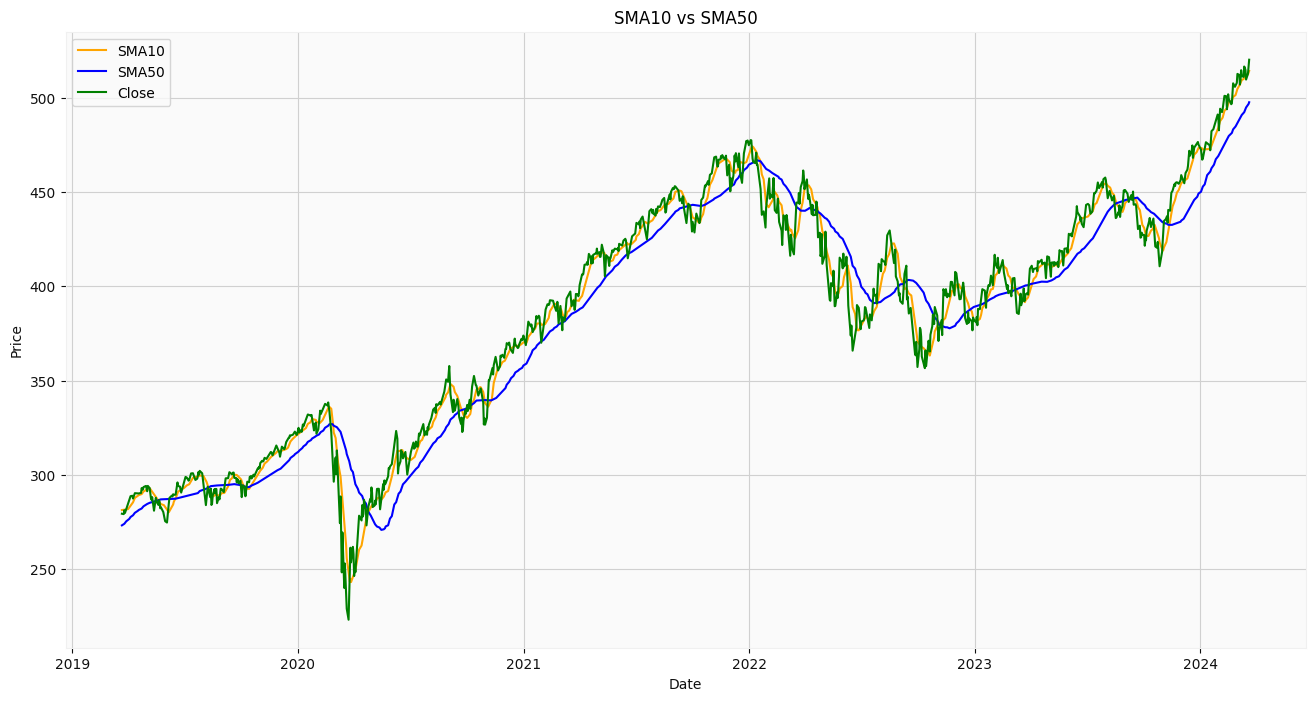

In [2309]:
plt.figure(figsize=(16, 8))
plt.plot(data['SMA10'], label='SMA10', color='orange')
plt.plot(data['SMA50'], label='SMA50', color='blue')
plt.plot(data['close'], label='Close', color='green')
plt.title('SMA10 vs SMA50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [1]:
#pct_change
data['daily_return']= data['close'].pct_change(-1) * 100 * -1

NameError: name 'data' is not defined

In [2311]:
data['change_direction'] = np.where(data['daily_return'] > 0, 'UP', 'DOWN')

In [2312]:
data = data.dropna()

In [2313]:
data

,open,high,low,close,volume,SMA50,SMA10,rsi,daily_return,change_direction
date,,,,,,,,,,
2019-03-22,283.22,283.80,279.18,279.25,122659286,273.0680,281.200,64.766141,-0.075258,DOWN
2019-03-25,278.87,280.19,277.64,279.04,85575197,273.4712,281.260,63.426746,0.739898,UP
2019-03-26,280.99,282.18,279.56,281.12,68125920,273.9140,281.423,70.207388,-0.525657,DOWN
2019-03-27,281.11,281.76,277.93,279.65,72224722,274.3590,281.254,61.285147,0.377614,UP
2019-03-28,280.35,281.21,279.07,280.71,56238545,274.7662,281.209,64.862846,0.626593,UP
...,...,...,...,...,...,...,...,...,...,...
2024-03-13,517.11,517.29,514.49,515.97,55104088,493.3420,512.072,65.767035,-0.198077,DOWN
2024-03-14,516.97,517.13,511.82,514.95,110171820,494.1880,512.759,63.224744,-1.004256,DOWN
2024-03-15,510.21,511.70,508.12,509.83,107646297,495.0088,512.457,52.011240,0.590805,UP


In [2314]:
data['change_direction'].value_counts()

UP      684
DOWN    573
Name: change_direction, dtype: int64

In [2315]:
#capitalize the first letter of each column
data.columns = data.columns.str.capitalize()

## Machine Learning Model

In [2316]:
y = data.Change_direction


In [2317]:
#make uppercase just the first letter of each column
x.columns = x.columns.str.capitalize()

In [2318]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [2319]:
model = DecisionTreeClassifier()

In [2320]:
model.fit(X=x_train, y=y_train)

DecisionTreeClassifier()

In [2321]:
y_pred = model.predict(X=x_test) 

In [2322]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.48412698412698413


In [3]:
#comparison data frame
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

NameError: name 'pd' is not defined

In [4]:
comp  = comparison['Actual'] == comparison['Predicted']

NameError: name 'comparison' is not defined

In [2325]:
comp.sum()

122

In [2326]:
len(comp)

252

In [2327]:
comp.sum() / len(comp)

0.48412698412698413

## Backtesting

In [2328]:
x_today = x.iloc[[-1], :]

In [2329]:
x_today

,Open,High,Low,Close,Volume
date,,,,,
2024-03-19,512.15,516.0,511.12,515.71,60755263


In [2330]:
forecast = model.predict(x_today)[0]

In [2331]:
forecast

'UP'

In [2332]:
#create a trading strategy 
class Classification(Strategy):
    def init(self):
        self.model = model
        self.already_bought = False

    def next(self):
        x_today = pd.DataFrame(x.iloc[[-1], :])
        forecast = model.predict(x_today)[0]

        if forecast == 'UP' and not self.already_bought:
            self.buy()
            self.already_bought = True
        elif forecast == 'DOWN' and self.already_bought:
            self.sell()
            self.already_bought = False
        else:
            pass

In [2333]:
bt = Backtest(data, Classification, cash=100000, commission=.002)

In [2334]:
bt.run()

Start                     2019-03-22 00:00:00
End                       2024-03-19 00:00:00
Duration                   1824 days 00:00:00
Exposure Time [%]                   99.840891
Equity Final [$]                  181862.2971
Equity Peak [$]                   183505.9471
Return [%]                          81.862297
Buy & Hold Return [%]               84.676813
Return (Ann.) [%]                   12.738569
Volatility (Ann.) [%]                23.92181
Sharpe Ratio                         0.532509
Sortino Ratio                        0.844266
Calmar Ratio                         0.373666
Max. Drawdown [%]                  -34.090826
Avg. Drawdown [%]                   -1.928971
Max. Drawdown Duration      746 days 00:00:00
Avg. Drawdown Duration       21 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      81.902468
Worst Trade [%]                     81.902468
Avg. Trade [%]                    

In [2335]:
class Classification(Strategy):
    def init(self):
        self.model = model
        

    def next(self):
        x_today = pd.DataFrame(x.iloc[[-1], :])
        forecast = model.predict(x_today)[0]

        if forecast == 'UP':
            self.buy()
        elif forecast == 'DOWN':
            self.sell()
        else:
            pass

In [2336]:
bt = Backtest(data, Classification, cash=10000, commission=.002)

In [2337]:
bt.run()

Start                     2019-03-22 00:00:00
End                       2024-03-19 00:00:00
Duration                   1824 days 00:00:00
Exposure Time [%]                   99.840891
Equity Final [$]                   18159.6802
Equity Peak [$]                    18232.9807
Return [%]                          81.596802
Buy & Hold Return [%]               84.676813
Return (Ann.) [%]                   12.705554
Volatility (Ann.) [%]               23.614756
Sharpe Ratio                         0.538035
Sortino Ratio                        0.852373
Calmar Ratio                         0.377128
Max. Drawdown [%]                  -33.690284
Avg. Drawdown [%]                   -1.908786
Max. Drawdown Duration      746 days 00:00:00
Avg. Drawdown Duration       21 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      81.902468
Worst Trade [%]                     81.902468
Avg. Trade [%]                    

# 20-period standard deviation - Strategy


In [2338]:
data

,Open,High,Low,Close,Volume,Sma50,Sma10,Rsi,Daily_return,Change_direction
date,,,,,,,,,,
2019-03-22,283.22,283.80,279.18,279.25,122659286,273.0680,281.200,64.766141,-0.075258,DOWN
2019-03-25,278.87,280.19,277.64,279.04,85575197,273.4712,281.260,63.426746,0.739898,UP
2019-03-26,280.99,282.18,279.56,281.12,68125920,273.9140,281.423,70.207388,-0.525657,DOWN
2019-03-27,281.11,281.76,277.93,279.65,72224722,274.3590,281.254,61.285147,0.377614,UP
2019-03-28,280.35,281.21,279.07,280.71,56238545,274.7662,281.209,64.862846,0.626593,UP
...,...,...,...,...,...,...,...,...,...,...
2024-03-13,517.11,517.29,514.49,515.97,55104088,493.3420,512.072,65.767035,-0.198077,DOWN
2024-03-14,516.97,517.13,511.82,514.95,110171820,494.1880,512.759,63.224744,-1.004256,DOWN
2024-03-15,510.21,511.70,508.12,509.83,107646297,495.0088,512.457,52.011240,0.590805,UP
